# Processing

In [ ]:
import pandas as pd
import numpy as np
import math

In [ ]:
pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 15.9 MB/s eta 0:00:00


In [ ]:
df = pd.read_excel("/content/khandle_analystsconverted.xlsx") #dataset available by request from Kaiser

In [ ]:
df = df[df['yrsbl']==0] #first wave
#the below filters remove subjects with missing modifiable lifestyle factors
df = df[df['W1_RELATIVES_NUM']==1] #reported number of relatives
df = df[df['W1_FRIENDS_NUM']==1] #reported number of friends
df = df[df['W1_SLEEP_QUALITY_HOURS_SLEEP']==1] #reported sleep quality
df = df[df['W1_CHILDREN_SEE']==1] #reported number of children

In [ ]:
#encoding race as one variable (not used in model)
df.loc[df['race_summary']=='White', ['race_summary']] = 0
df.loc[df['race_summary']=='Black', ['race_summary']] = 1
df.loc[df['race_summary']=='Asian', ['race_summary']] = 2
df.loc[df['race_summary']=='LatinX', ['race_summary']] = 3
df.loc[df['race_summary']=='Native American', ['race_summary']] = 4
df[['race_summary']] = df[['race_summary']].apply(pd.to_numeric)

In [ ]:
#pertinent variables with missingness below acceptable threshold
next = df[['study','gender','W1_MARITAL_STATUS','W1_PHYS_LUNG2','W1_CA_COOK','W1_CA_CLASS','W1_CA_GAME','W1_CA_WRITE','W1_INCOME_RANGE','W1_VOLUNTEER_WORK','W1_CA_PERFART',
         'W1_LADDER1','W1_HEALTH','W1_PHYS_GRIPL1','W1_PHYS_GRIPR1','W1_RELATIVES_NUM_TEXT','W1_CA_ARTCFT','W1_PA_VIG_EX','W1_PA_LT_EX','W1_CHILDREN_SEE_TEXT',
         'W1_SLEEP_QUALITY_HOURS_SLP_HRS','W1_FRIENDS_NUM_TEXT','W1_CA_CULT','educ_yrs', 'race_summary','vrmem']]

In [ ]:
#encoding cohort binary variable (not in model)
next.loc[next['study']=='KHANDLE', ['study']] = 1
next.loc[next['study']=='STAR', ['study']] = 0
next[['study']] = next[['study']].apply(pd.to_numeric)
#renamed for clarity on data visuals
next = next.rename(columns={'study':'isKhandleBin', 'gender':'sex', 'W1_MARITAL_STATUS':'marital_status','W1_PHYS_LUNG2':'lung_capacity',
                              'W1_CA_COOK': 'cooking_freq', 'W1_CA_CLASS': 'class_freq', 'W1_CA_GAME': 'game_freq',
                              'W1_CA_WRITE': 'writing_freq','W1_INCOME_RANGE': 'income_range', 'W1_VOLUNTEER_WORK': 'volunteer_work',
                              'W1_CA_PERFART': 'art_perf_freq','W1_LADDER1': 'social_standing', 'W1_HEALTH': 'general_health',
                              'W1_PHYS_GRIPL1': 'L_grip', 'W1_PHYS_GRIPR1': 'R_grip','W1_RELATIVES_NUM_TEXT': 'num_close_relative',
                              'W1_CA_ARTCFT': 'artcft_freq', 'W1_PA_VIG_EX': 'vig_exc', 'W1_PA_LT_EX': 'lte_exc','W1_CHILDREN_SEE_TEXT':'children_see',
                              'W1_SLEEP_QUALITY_HOURS_SLP_HRS': 'quality_sleep_hrs', 'W1_FRIENDS_NUM_TEXT': 'num_close_friend',
                              'W1_CA_CULT': 'cultural_eng_freq'
                              }
                    )

<ipython-input-8-7f4d5bfc8a0f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  next[['study']] = next[['study']].apply(pd.to_numeric)


In [ ]:
next = next.dropna(axis=0, inplace=False) #removing remaining subjects with missingness in pertinent variables (~200 subjects)
#re-encoding response values to diminish ambiguity
#LTAs
next.loc[next['cooking_freq']==5, ['cooking_freq']] =0
next.loc[next['cooking_freq']==1, ['cooking_freq']] =5
next.loc[next['cooking_freq']==4, ['cooking_freq']] =1
next.loc[next['cooking_freq']==2, ['cooking_freq']] =6
next.loc[next['cooking_freq']==3, ['cooking_freq']] =2
next.loc[next['cooking_freq']==6, ['cooking_freq']] =3 #was 2, now 6
next.loc[next['cooking_freq']==5, ['cooking_freq']] =4 #was 1, now 5

next.loc[next['class_freq']==5, ['class_freq']] =0
next.loc[next['class_freq']==1, ['class_freq']] =5
next.loc[next['class_freq']==4, ['class_freq']] =1
next.loc[next['class_freq']==2, ['class_freq']] =6
next.loc[next['class_freq']==3, ['class_freq']] =2
next.loc[next['class_freq']==6, ['class_freq']] =3 #was 2, now 6
next.loc[next['class_freq']==5, ['class_freq']] =4 #was 1, now 5

next.loc[next['game_freq']==5, ['game_freq']] =0
next.loc[next['game_freq']==1, ['game_freq']] =5
next.loc[next['game_freq']==4, ['game_freq']] =1
next.loc[next['game_freq']==2, ['game_freq']] =6
next.loc[next['game_freq']==3, ['game_freq']] =2
next.loc[next['game_freq']==6, ['game_freq']] =3 #was 2, now 6
next.loc[next['game_freq']==5, ['game_freq']] =4 #was 1, now 5

next.loc[next['writing_freq']==5, ['writing_freq']] =0
next.loc[next['writing_freq']==1, ['writing_freq']] =5
next.loc[next['writing_freq']==4, ['writing_freq']] =1
next.loc[next['writing_freq']==2, ['writing_freq']] =6
next.loc[next['writing_freq']==3, ['writing_freq']] =2
next.loc[next['writing_freq']==6, ['writing_freq']] =3 #was 2, now 6
next.loc[next['writing_freq']==5, ['writing_freq']] =4 #was 1, now 5

next.loc[next['art_perf_freq']==5, ['art_perf_freq']] =0
next.loc[next['art_perf_freq']==1, ['art_perf_freq']] =5
next.loc[next['art_perf_freq']==4, ['art_perf_freq']] =1
next.loc[next['art_perf_freq']==2, ['art_perf_freq']] =6
next.loc[next['art_perf_freq']==3, ['art_perf_freq']] =2
next.loc[next['art_perf_freq']==6, ['art_perf_freq']] =3 #was 2, now 6
next.loc[next['art_perf_freq']==5, ['art_perf_freq']] =4 #was 1, now 5

next.loc[next['artcft_freq']==5, ['artcft_freq']] =0
next.loc[next['artcft_freq']==1, ['artcft_freq']] =5
next.loc[next['artcft_freq']==4, ['artcft_freq']] =1
next.loc[next['artcft_freq']==2, ['artcft_freq']] =6
next.loc[next['artcft_freq']==3, ['artcft_freq']] =2
next.loc[next['artcft_freq']==6, ['artcft_freq']] =3 #was 2, now 6
next.loc[next['artcft_freq']==5, ['artcft_freq']] =4 #was 1, now 5

next.loc[next['cultural_eng_freq']==5, ['cultural_eng_freq']] =0
next.loc[next['cultural_eng_freq']==1, ['cultural_eng_freq']] =5
next.loc[next['cultural_eng_freq']==4, ['cultural_eng_freq']] =1
next.loc[next['cultural_eng_freq']==2, ['cultural_eng_freq']] =6
next.loc[next['cultural_eng_freq']==3, ['cultural_eng_freq']] =2
next.loc[next['cultural_eng_freq']==6, ['cultural_eng_freq']] =3 #was 2, now 6
next.loc[next['cultural_eng_freq']==5, ['cultural_eng_freq']] =4 #was 1, now 5

#Physical performance
next.loc[next['vig_exc']==5, ['vig_exc']] =0
next.loc[next['vig_exc']==1, ['vig_exc']] =5
next.loc[next['vig_exc']==4, ['vig_exc']] =1
next.loc[next['vig_exc']==2, ['vig_exc']] =6
next.loc[next['vig_exc']==3, ['vig_exc']] =2
next.loc[next['vig_exc']==6, ['vig_exc']] =3 #was 2, now 6
next.loc[next['vig_exc']==5, ['vig_exc']] =4 #was 1, now 5

next.loc[next['lte_exc']==5, ['lte_exc']] =0
next.loc[next['lte_exc']==1, ['lte_exc']] =5
next.loc[next['lte_exc']==4, ['lte_exc']] =1
next.loc[next['lte_exc']==2, ['lte_exc']] =6
next.loc[next['lte_exc']==3, ['lte_exc']] =2
next.loc[next['lte_exc']==6, ['lte_exc']] =3 #was 2, now 6
next.loc[next['lte_exc']==5, ['lte_exc']] =4 #was 1, now 5

#best general health reported as 1, changed to higher value=better health
next.loc[next['general_health']==5, ['general_health']] =0
next.loc[next['general_health']==1, ['general_health']] =5
next.loc[next['general_health']==4, ['general_health']] =1
next.loc[next['general_health']==2, ['general_health']] =6
next.loc[next['general_health']==3, ['general_health']] =2
next.loc[next['general_health']==6, ['general_health']] =3 #was 2, now 6
next.loc[next['general_health']==5, ['general_health']] =4 #was 1, now 5

#Socialization
next.loc[next['volunteer_work']==2, ['volunteer_work']] = 0 #did not volunteer becomes 0
#marital status???

#drop 2 native american subjects (not enough for a valid demographic group)
next = next[next['race_summary']!=4]

In [ ]:
#subgroups for post hoc comparison (not in model)
blackSubgroup = next[next['race_summary']==1]
whiteSubgroup = next[next['race_summary']==0]
asianSubgroup = next[next['race_summary']==2]
hispanicSubgroup = next[next['race_summary']==3]

In [ ]:
#modeling cohort
test = next.drop(columns=['race_summary'], inplace=False)
test.shape

(1730, 25)

# Cohort tables

In [ ]:
next.groupby('race_summary').mean()

,isKhandleBin,sex,marital_status,lung_capacity,cooking_freq,class_freq,game_freq,writing_freq,income_range,volunteer_work,...,num_close_relative,artcft_freq,vig_exc,lte_exc,children_see,quality_sleep_hrs,num_close_friend,cultural_eng_freq,educ_yrs,vrmem
race_summary,,,,,,,,,,,,,,,,,,,,,
0,1.000000,1.567010,2.587629,340.244845,1.703608,1.113402,2.296392,2.855670,17.061856,0.528351,...,3.115979,1.407216,1.476804,3.211340,1.420103,7.095361,4.886598,1.350515,15.108247,0.210791
1,0.434109,1.700258,3.083979,326.892765,1.925065,1.425065,2.329457,2.901809,14.319121,0.531008,...,5.096899,1.313953,1.667959,3.098191,1.673127,6.142119,4.563307,1.520672,14.436693,0.229445
2,1.000000,1.490625,2.018750,346.031250,1.687500,1.656250,2.078125,2.731250,18.681250,0.740625,...,3.256250,1.459375,1.700000,2.965625,1.621875,6.468750,4.540625,1.462500,15.521875,0.243464
3,0.983871,1.580645,2.427419,324.314516,2.536290,3.032258,2.766129,3.733871,15.560484,0.431452,...,3.588710,2.633065,2.056452,2.649194,1.677419,6.689516,4.092742,2.092742,13.495968,-0.013425


In [ ]:
next.groupby('sex').mean()

,isKhandleBin,marital_status,lung_capacity,cooking_freq,class_freq,game_freq,writing_freq,income_range,volunteer_work,art_perf_freq,...,artcft_freq,vig_exc,lte_exc,children_see,quality_sleep_hrs,num_close_friend,cultural_eng_freq,educ_yrs,race_summary,vrmem
sex,,,,,,,,,,,,,,,,,,,,,
1,0.817091,1.842579,410.217391,1.395802,1.727136,1.953523,2.602699,16.650675,0.605697,1.118441,...,1.401799,1.763118,2.799100,1.602699,6.527736,4.830585,1.670165,14.974513,1.304348,-0.125914
2,0.698965,3.207902,284.642521,2.247413,1.566322,2.579492,3.215428,15.460019,0.523048,1.313264,...,1.644403,1.638758,3.182502,1.610536,6.474130,4.396990,1.480715,14.451552,1.211665,0.393172


In [ ]:
next.groupby('isKhandleBin').mean()

,sex,marital_status,lung_capacity,cooking_freq,class_freq,game_freq,writing_freq,income_range,volunteer_work,art_perf_freq,...,artcft_freq,vig_exc,lte_exc,children_see,quality_sleep_hrs,num_close_friend,cultural_eng_freq,educ_yrs,race_summary,vrmem
isKhandleBin,,,,,,,,,,,,,,,,,,,,,
0,1.723982,3.167421,348.642534,1.938914,1.742081,2.242081,3.040724,13.176471,0.545249,1.411765,...,1.316742,1.574661,3.074661,1.647059,6.160633,4.242081,1.481900,14.622172,1.018100,0.392064
1,1.576863,2.514752,327.709627,1.912267,1.589286,2.371118,2.958075,16.860248,0.558230,1.178571,...,1.631211,1.725155,3.020963,1.593944,6.609472,4.674689,1.578416,14.663820,1.326087,0.124739


# Episodic modeling and SHAP data summary

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
#for the sake of reproducability, do I need to include the preliminary modeling that showed the below threshold LTAs
#which got removed from the working models??? or is the comment below the final model outputs sufficient???

In [ ]:
test.columns

Index(['isKhandleBin', 'sex', 'marital_status', 'lung_capacity',
       'cooking_freq', 'class_freq', 'game_freq', 'writing_freq',
       'income_range', 'volunteer_work', 'art_perf_freq', 'social_standing',
       'general_health', 'L_grip', 'R_grip', 'num_close_relative',
       'artcft_freq', 'vig_exc', 'lte_exc', 'children_see',
       'quality_sleep_hrs', 'num_close_friend', 'cultural_eng_freq',
       'educ_yrs', 'vrmem'],
      dtype='object')

In [ ]:
yEp = test['vrmem']
XEp = test.drop(columns=['vrmem', 'isKhandleBin'])

In [ ]:
from sklearn.model_selection import GridSearchCV
#below is the method for hyperparameter optimization and the commented out options considered in modified racing method of selection
paramGrid = {
    #'learning_rate': [0.05], #0.1,0.01, 0.03,0.04,0.08,0.06, 0.07, 0.09
    #'n_estimators': [165], #300,200,140,60,120,100, 70, 80, 90,95, 135, 145, 155, 175, 185
    #'min_samples_leaf': [5], #7,2,3, 6,4
    #'max_depth': [3], #5,1, 2,4
}
est = GradientBoostingRegressor(
    loss='squared_error',
    learning_rate=0.05,
    criterion='friedman_mse',
    min_samples_split=2,
    max_depth=3,
    min_samples_leaf=5,
    max_features=1.0,
    n_estimators=165
    )
gsCv = GridSearchCV(est, paramGrid, n_jobs=-1, verbose=3).fit(XEp,yEp)
gsCv.best_params_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


{}

In [ ]:
#whole cohort model, with random 80% subsample
gbr = GradientBoostingRegressor(
    loss='squared_error',
    learning_rate=0.05,
    subsample=0.8,
    criterion='friedman_mse',
    min_samples_split=2,
    max_depth=3,
    min_samples_leaf=5,
    max_features=1.0,
    n_estimators=165,
    random_state=42,
    verbose=1
)

modelEp = gbr.fit(XEp,yEp)
modelEp.score(XEp,yEp)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.7391           0.0145            1.49s
         2           0.7156          -0.0228            1.24s
         3           0.7160           0.0713            1.53s
         4           0.6944          -0.0234            1.37s
         5           0.6932           0.0531            1.27s
         6           0.6685          -0.0516            1.19s
         7           0.6553          -0.0056            1.14s
         8           0.6675           0.0966            1.10s
         9           0.6457          -0.0470            1.06s
        10           0.6487           0.0464            1.04s
        20           0.5840          -0.0571            1.07s
        30           0.5449          -0.0264            0.97s
        40           0.5251          -0.0269            0.84s
        50           0.5149           0.0187            0.74s
        60           0.5148           0.0365            0.70s
       

0.46189465643464933

In [ ]:
#method for mean absolute SHAP value printing with softmax normalization for interpretability
import shap
from scipy.special import softmax

def print_feature_importances_shap_values(shap_values, features):
    '''
    Prints the feature importances based on SHAP values in an ordered way
    shap_values -> The SHAP values calculated from a shap.Explainer object
    features -> The name of the features, on the order presented to the explainer
    '''
    # Calculates the feature importance (mean absolute shap value) for each feature
    importances = []
    for i in range(shap_values.values.shape[1]):
        importances.append(np.mean(np.abs(shap_values.values[:, i])))
    # Calculates the normalized version
    importances_norm = softmax(importances)
    # Organize the importances and columns in a dictionary
    feature_importances = {fea: imp for imp, fea in zip(importances, features)}
    feature_importances_norm = {fea: imp for imp, fea in zip(importances_norm, features)}
    # Sorts the dictionary
    feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse = True)}
    feature_importances_norm= {k: v for k, v in sorted(feature_importances_norm.items(), key=lambda item: item[1], reverse = True)}
    # Prints the feature importances
    for k, v in feature_importances.items():
        print(f"{k} -> {v:.4f} (softmax = {feature_importances_norm[k]:.4f})")

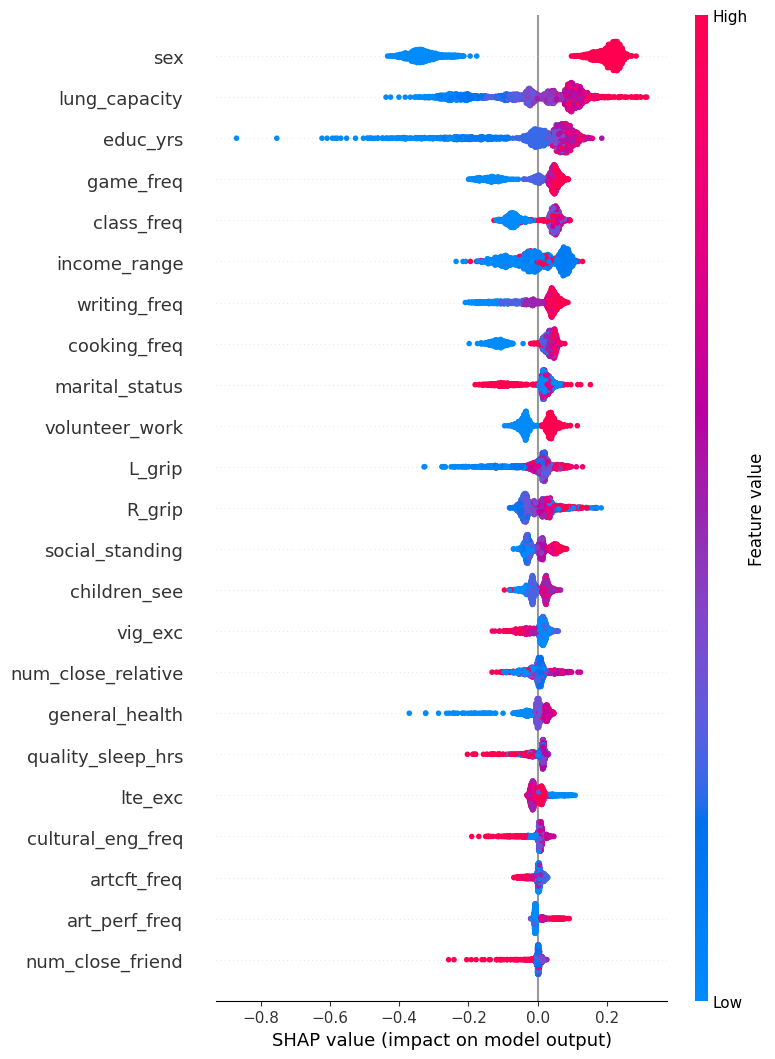

sex -> 0.2547 (softmax = 0.0534)
lung_capacity -> 0.1128 (softmax = 0.0463)
educ_yrs -> 0.0910 (softmax = 0.0453)
game_freq -> 0.0632 (softmax = 0.0441)
class_freq -> 0.0589 (softmax = 0.0439)
income_range -> 0.0573 (softmax = 0.0438)
writing_freq -> 0.0548 (softmax = 0.0437)
cooking_freq -> 0.0546 (softmax = 0.0437)
marital_status -> 0.0414 (softmax = 0.0431)
volunteer_work -> 0.0398 (softmax = 0.0431)
L_grip -> 0.0381 (softmax = 0.0430)
R_grip -> 0.0347 (softmax = 0.0429)
social_standing -> 0.0283 (softmax = 0.0426)
children_see -> 0.0235 (softmax = 0.0424)
vig_exc -> 0.0226 (softmax = 0.0423)
num_close_relative -> 0.0213 (softmax = 0.0423)
general_health -> 0.0213 (softmax = 0.0423)
quality_sleep_hrs -> 0.0194 (softmax = 0.0422)
lte_exc -> 0.0161 (softmax = 0.0421)
cultural_eng_freq -> 0.0140 (softmax = 0.0420)
artcft_freq -> 0.0119 (softmax = 0.0419)
art_perf_freq -> 0.0103 (softmax = 0.0418)
num_close_friend -> 0.0069 (softmax = 0.0417)


In [ ]:
#whole cohort model beeswarm and mean absolute shap values printout
explainerEp = shap.Explainer(modelEp)
shap_valuesEp = explainerEp(XEp)
shap.summary_plot(shap_valuesEp, XEp, show=True, max_display=XEp.shape[1])
print_feature_importances_shap_values(shap_valuesEp, XEp.columns)

In [ ]:
#partitioning of dataset in order to perform cross validated model evaluation
#also prints partitioned cohort stats for verification of possible bias
from sklearn.model_selection import KFold

n_splits = 5

kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

for fold_idx, (train_indices, test_indices) in enumerate(kf.split(XEp)):
    # Split data into train and test sets
    X_train, X_test = XEp.iloc[train_indices], XEp.iloc[test_indices]
    y_train, y_test = yEp.iloc[train_indices], yEp.iloc[test_indices]
    # Print train and test group sizes
    print(f"Fold {fold_idx + 1}:")
    print(f"Train set size: {len(train_indices)}")
    print(f"Test set size: {len(test_indices)}")

    # Print mean and standard deviation for y_train and y_test
    print(f"y_train mean: {np.mean(y_train)}, y_train std: {np.std(y_train)}")
    print(f"y_test mean: {np.mean(y_test)}, y_test std: {np.std(y_test)}\n")

Fold 1:
Train set size: 1384
Test set size: 346
y_train mean: 0.18298786127167627, y_train std: 0.8734091121209396
y_test mean: 0.23324161849710984, y_test std: 0.8560614602360199

Fold 2:
Train set size: 1384
Test set size: 346
y_train mean: 0.18851416184971098, y_train std: 0.8639211534678778
y_test mean: 0.21113641618497112, y_test std: 0.894643523190749

Fold 3:
Train set size: 1384
Test set size: 346
y_train mean: 0.2005015895953757, y_train std: 0.8827496382479876
y_test mean: 0.16318670520231213, y_test std: 0.8173945611218442

Fold 4:
Train set size: 1384
Test set size: 346
y_train mean: 0.21740628612716761, y_train std: 0.8629864865649528
y_test mean: 0.09556791907514452, y_test std: 0.8918391728409271

Fold 5:
Train set size: 1384
Test set size: 346
y_train mean: 0.1757831647398844, y_train std: 0.8671625739703586
y_test mean: 0.26206040462427743, y_test std: 0.8788610560605993



      Iter       Train Loss   Remaining Time 
         1           0.7459            1.42s
         2           0.7308            1.72s
         3           0.7168            2.03s
         4           0.7050            1.74s
         5           0.6947            1.56s
         6           0.6845            1.43s
         7           0.6754            1.44s
         8           0.6669            1.42s
         9           0.6590            1.41s
        10           0.6515            1.35s
        20           0.5941            1.26s
        30           0.5556            1.17s
        40           0.5272            1.35s
        50           0.5064            1.29s
        60           0.4905            1.22s
        70           0.4775            1.12s
        80           0.4653            1.05s
        90           0.4540            0.93s
       100           0.4442            0.76s


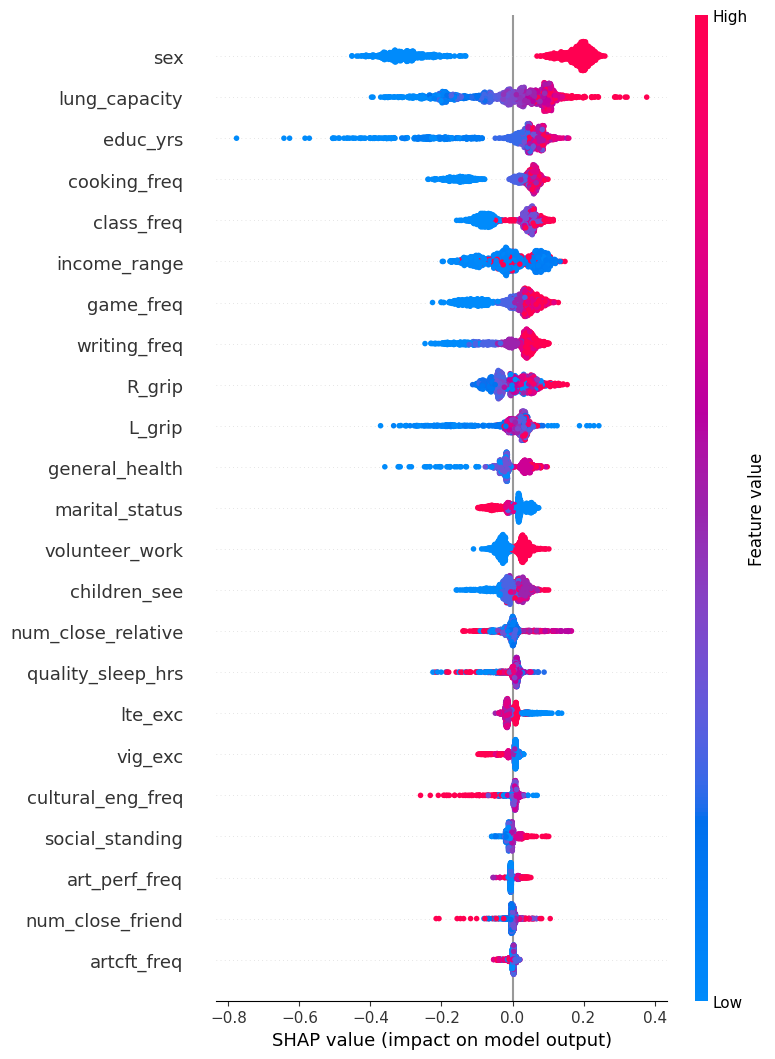

sex -> 0.2318 (softmax = 0.0523)
lung_capacity -> 0.0984 (softmax = 0.0458)
educ_yrs -> 0.0889 (softmax = 0.0453)
cooking_freq -> 0.0746 (softmax = 0.0447)
class_freq -> 0.0633 (softmax = 0.0442)
income_range -> 0.0586 (softmax = 0.0440)
game_freq -> 0.0586 (softmax = 0.0440)
writing_freq -> 0.0570 (softmax = 0.0439)
R_grip -> 0.0438 (softmax = 0.0433)
L_grip -> 0.0407 (softmax = 0.0432)
general_health -> 0.0354 (softmax = 0.0430)
marital_status -> 0.0318 (softmax = 0.0428)
volunteer_work -> 0.0309 (softmax = 0.0428)
children_see -> 0.0271 (softmax = 0.0426)
num_close_relative -> 0.0214 (softmax = 0.0424)
quality_sleep_hrs -> 0.0182 (softmax = 0.0422)
lte_exc -> 0.0172 (softmax = 0.0422)
vig_exc -> 0.0151 (softmax = 0.0421)
cultural_eng_freq -> 0.0140 (softmax = 0.0421)
social_standing -> 0.0122 (softmax = 0.0420)
art_perf_freq -> 0.0086 (softmax = 0.0418)
num_close_friend -> 0.0078 (softmax = 0.0418)
artcft_freq -> 0.0067 (softmax = 0.0417)
      Iter       Train Loss   Remaining Time

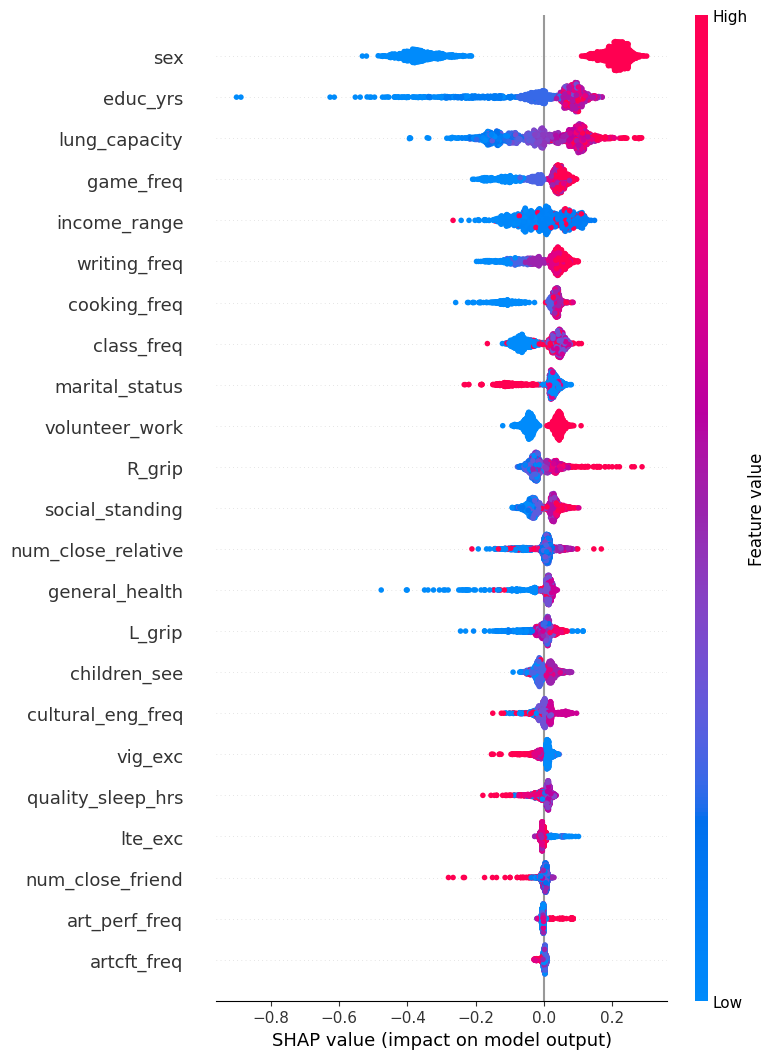

sex -> 0.2697 (softmax = 0.0543)
educ_yrs -> 0.0998 (softmax = 0.0458)
lung_capacity -> 0.0960 (softmax = 0.0456)
game_freq -> 0.0595 (softmax = 0.0440)
income_range -> 0.0566 (softmax = 0.0438)
writing_freq -> 0.0528 (softmax = 0.0437)
cooking_freq -> 0.0519 (softmax = 0.0436)
class_freq -> 0.0508 (softmax = 0.0436)
marital_status -> 0.0456 (softmax = 0.0434)
volunteer_work -> 0.0443 (softmax = 0.0433)
R_grip -> 0.0332 (softmax = 0.0428)
social_standing -> 0.0331 (softmax = 0.0428)
num_close_relative -> 0.0274 (softmax = 0.0426)
general_health -> 0.0262 (softmax = 0.0425)
L_grip -> 0.0254 (softmax = 0.0425)
children_see -> 0.0207 (softmax = 0.0423)
cultural_eng_freq -> 0.0193 (softmax = 0.0422)
vig_exc -> 0.0186 (softmax = 0.0422)
quality_sleep_hrs -> 0.0174 (softmax = 0.0422)
lte_exc -> 0.0082 (softmax = 0.0418)
num_close_friend -> 0.0081 (softmax = 0.0418)
art_perf_freq -> 0.0058 (softmax = 0.0417)
artcft_freq -> 0.0045 (softmax = 0.0416)
      Iter       Train Loss   Remaining Time

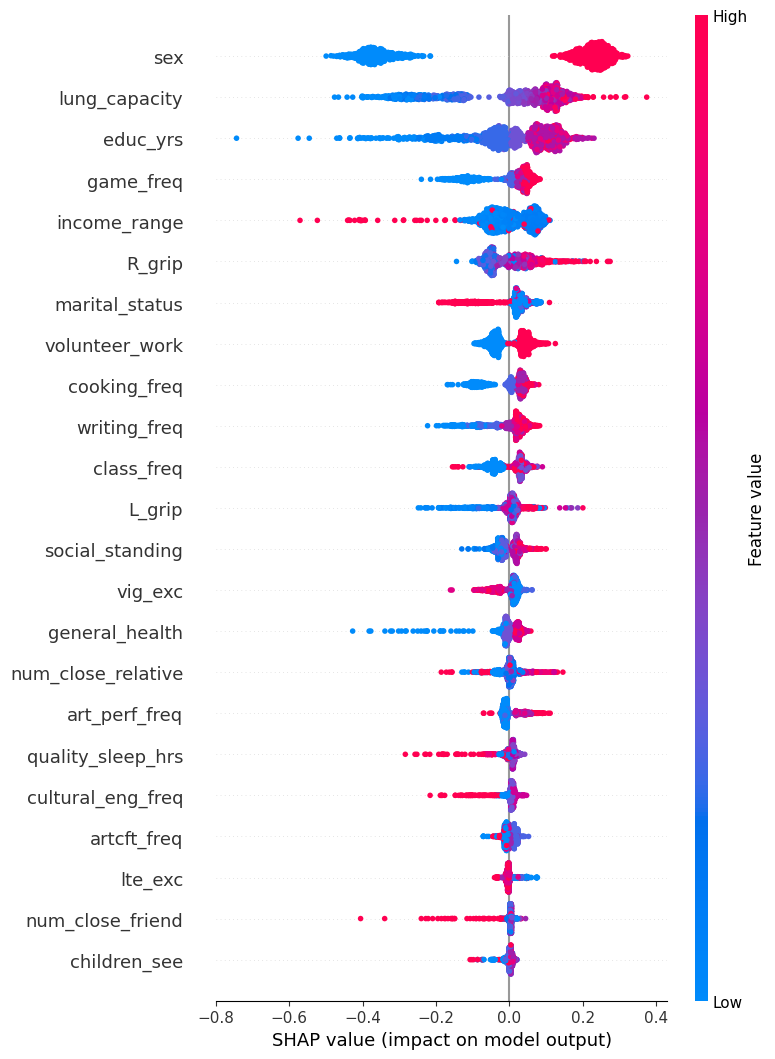

sex -> 0.2834 (softmax = 0.0550)
lung_capacity -> 0.1308 (softmax = 0.0472)
educ_yrs -> 0.0978 (softmax = 0.0457)
game_freq -> 0.0533 (softmax = 0.0437)
income_range -> 0.0528 (softmax = 0.0437)
R_grip -> 0.0495 (softmax = 0.0435)
marital_status -> 0.0448 (softmax = 0.0433)
volunteer_work -> 0.0436 (softmax = 0.0433)
cooking_freq -> 0.0422 (softmax = 0.0432)
writing_freq -> 0.0392 (softmax = 0.0431)
class_freq -> 0.0371 (softmax = 0.0430)
L_grip -> 0.0294 (softmax = 0.0427)
social_standing -> 0.0244 (softmax = 0.0424)
vig_exc -> 0.0222 (softmax = 0.0424)
general_health -> 0.0204 (softmax = 0.0423)
num_close_relative -> 0.0190 (softmax = 0.0422)
art_perf_freq -> 0.0185 (softmax = 0.0422)
quality_sleep_hrs -> 0.0148 (softmax = 0.0420)
cultural_eng_freq -> 0.0133 (softmax = 0.0420)
artcft_freq -> 0.0109 (softmax = 0.0419)
lte_exc -> 0.0083 (softmax = 0.0418)
num_close_friend -> 0.0080 (softmax = 0.0418)
children_see -> 0.0067 (softmax = 0.0417)
      Iter       Train Loss   Remaining Time

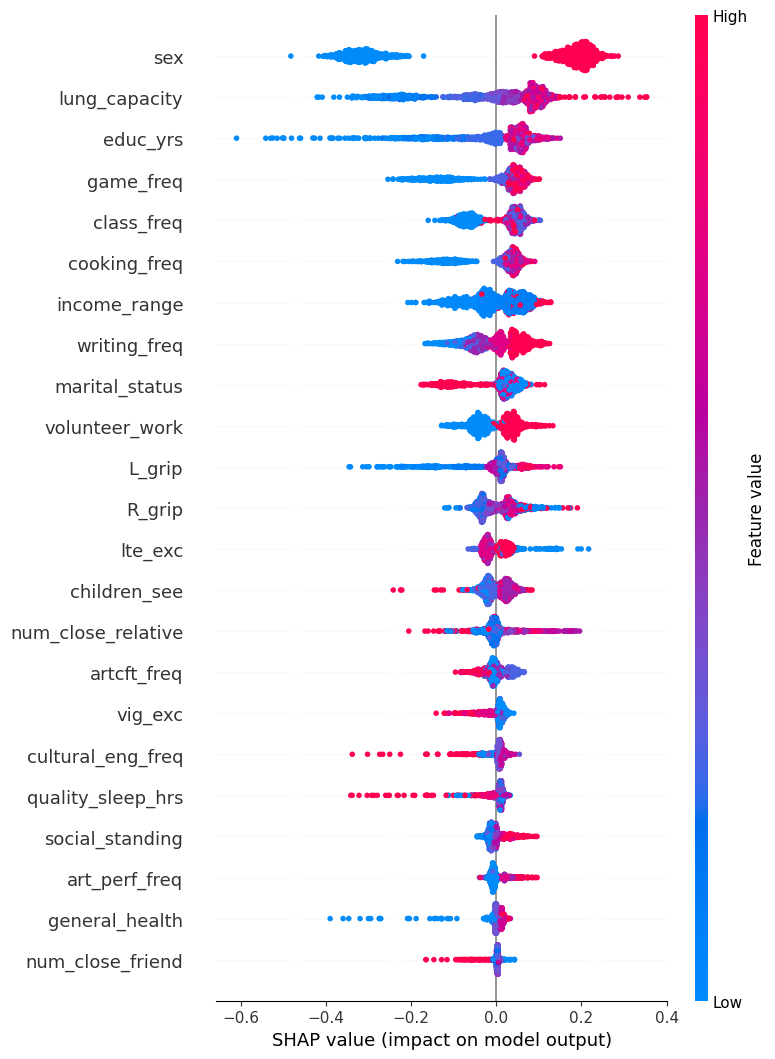

sex -> 0.2392 (softmax = 0.0527)
lung_capacity -> 0.1013 (softmax = 0.0459)
educ_yrs -> 0.0742 (softmax = 0.0447)
game_freq -> 0.0656 (softmax = 0.0443)
class_freq -> 0.0566 (softmax = 0.0439)
cooking_freq -> 0.0560 (softmax = 0.0439)
income_range -> 0.0492 (softmax = 0.0436)
writing_freq -> 0.0491 (softmax = 0.0436)
marital_status -> 0.0451 (softmax = 0.0434)
volunteer_work -> 0.0402 (softmax = 0.0432)
L_grip -> 0.0391 (softmax = 0.0432)
R_grip -> 0.0362 (softmax = 0.0430)
lte_exc -> 0.0251 (softmax = 0.0426)
children_see -> 0.0244 (softmax = 0.0425)
num_close_relative -> 0.0240 (softmax = 0.0425)
artcft_freq -> 0.0201 (softmax = 0.0423)
vig_exc -> 0.0173 (softmax = 0.0422)
cultural_eng_freq -> 0.0163 (softmax = 0.0422)
quality_sleep_hrs -> 0.0163 (softmax = 0.0422)
social_standing -> 0.0152 (softmax = 0.0421)
art_perf_freq -> 0.0126 (softmax = 0.0420)
general_health -> 0.0115 (softmax = 0.0420)
num_close_friend -> 0.0067 (softmax = 0.0418)
      Iter       Train Loss   Remaining Time

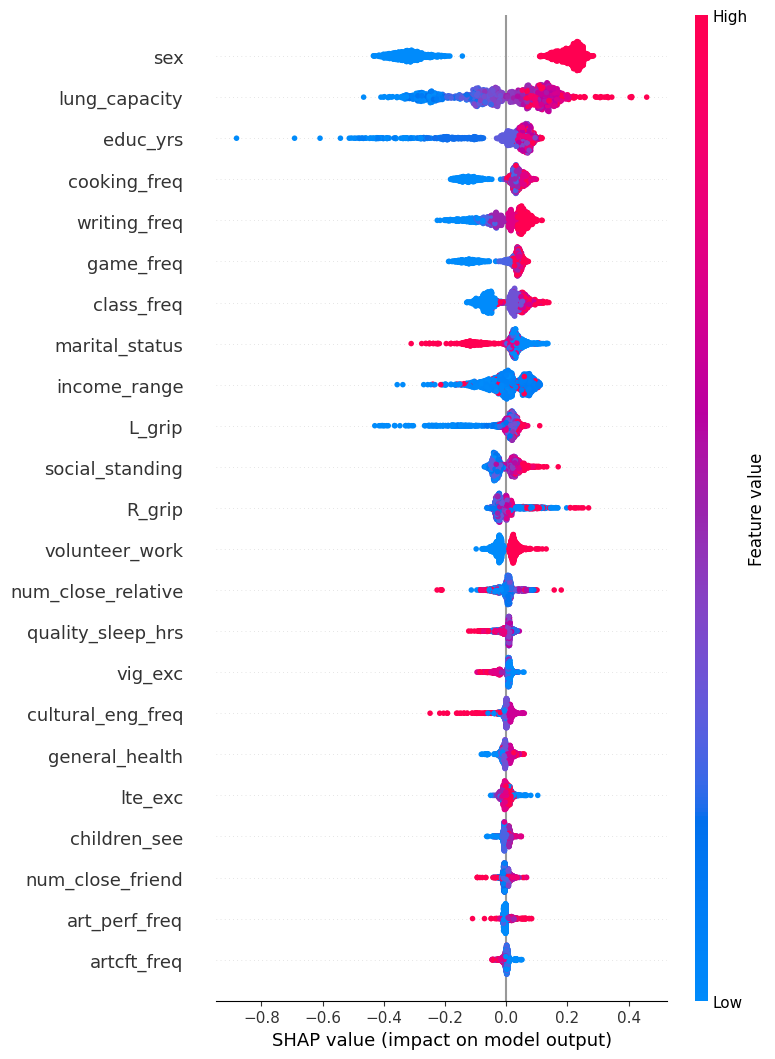

sex -> 0.2536 (softmax = 0.0535)
lung_capacity -> 0.1267 (softmax = 0.0471)
educ_yrs -> 0.0836 (softmax = 0.0451)
cooking_freq -> 0.0603 (softmax = 0.0441)
writing_freq -> 0.0542 (softmax = 0.0438)
game_freq -> 0.0542 (softmax = 0.0438)
class_freq -> 0.0528 (softmax = 0.0438)
marital_status -> 0.0504 (softmax = 0.0437)
income_range -> 0.0489 (softmax = 0.0436)
L_grip -> 0.0384 (softmax = 0.0431)
social_standing -> 0.0338 (softmax = 0.0429)
R_grip -> 0.0282 (softmax = 0.0427)
volunteer_work -> 0.0278 (softmax = 0.0427)
num_close_relative -> 0.0198 (softmax = 0.0423)
quality_sleep_hrs -> 0.0161 (softmax = 0.0422)
vig_exc -> 0.0158 (softmax = 0.0422)
cultural_eng_freq -> 0.0130 (softmax = 0.0421)
general_health -> 0.0126 (softmax = 0.0420)
lte_exc -> 0.0100 (softmax = 0.0419)
children_see -> 0.0096 (softmax = 0.0419)
num_close_friend -> 0.0088 (softmax = 0.0419)
art_perf_freq -> 0.0085 (softmax = 0.0419)
artcft_freq -> 0.0063 (softmax = 0.0418)
Mean train score: 0.47638558078863735
Mean t

In [ ]:
# Initialize lists to store train and test scores for each model from each dataset partition
train_scores = []
test_scores = []

# Loop through the splits and train the model
for fold_idx, (train_indices, test_indices) in enumerate(kf.split(XEp)):
    X_train, X_test = XEp.iloc[train_indices], XEp.iloc[test_indices]
    y_train, y_test = yEp.iloc[train_indices], yEp.iloc[test_indices]

    gbr = GradientBoostingRegressor(
        loss='squared_error',
        learning_rate=0.05,
        criterion='friedman_mse',
        min_samples_split=2,
        max_depth=3,
        min_samples_leaf=5,
        max_features=1.0,
        n_estimators=165,
        random_state=42,
        verbose=1
    )
    modelStrat = gbr.fit(X_train, y_train)

    #add beeswarm shap plot here to verify feature importances for EACH model
    explainerStrat = shap.Explainer(modelStrat)
    shap_valuesStrat = explainerStrat(X_train)
    shap.summary_plot(shap_valuesStrat, X_train, show=True, max_display=X_train.shape[1])
    print_feature_importances_shap_values(shap_valuesStrat, X_train.columns)
    # Calculate training and test scores
    train_score = modelStrat.score(X_train, y_train)
    test_score = modelStrat.score(X_test, y_test)

    # Append scores to lists
    train_scores.append(train_score)
    test_scores.append(test_score)

# Calculate mean scores
mean_train_score = sum(train_scores) / len(train_scores)
mean_test_score = sum(test_scores) / len(test_scores)

print("Mean train score:", mean_train_score)
print("Mean test score:", mean_test_score)

In [ ]:
print(train_scores)
print(test_scores)

[0.4839890569350166, 0.4814270693521313, 0.4799273608009469, 0.46217275374627786, 0.4744116631088141]
[0.24174385183416036, 0.22373704699531038, 0.20323842661142266, 0.31491166247409197, 0.2651780409782545]


In [ ]:
#the following features removed because they were below threshold of SHAP 0.01 for all 5 models
# W1_CA_READ= [.0012,.0025,.0016,.0011,.0000]
# W1_CONFIDANTE_OFTEN= [.0026,.0034,.0080,.0065,.0009]
# alcBin= [.0020,.0032,.0014,.0096,.0035]
# W1_CA_CLUB= [.0082,.0027,.0098,.0070,.0040]
# W1_CA_SOC= [.0049,.0057,.0034,.0037,.0055]
# W1_SMK= [.0010,.0000,.0007,.0010,.0091]

# Visualizations

In [ ]:
#mean absolute shap values for each feature for each model
tot = {
    'artcft_freq': [0.0063, 0.0201, 0.0109, 0.0045, 0.0067],
    'cultural_eng_freq': [0.0130, 0.0163, 0.0133, 0.0193, 0.0140],
    'cooking_freq': [0.0603, 0.0560, 0.0422, 0.0519, 0.0746],
    'game_freq': [0.0542, 0.0656, 0.0533, 0.0595, 0.0586],
    'class_freq': [0.0528, 0.0566, 0.0371, 0.0508, 0.0633],
    'writing_freq': [0.0542, 0.0491, 0.0392, 0.0528, 0.0570],
    'art_perf_freq': [0.0085, 0.0126, 0.0185, 0.0058, 0.0086],
    'general_health': [0.0126, 0.0115, 0.0204, 0.0262, 0.0354],
    'lung_capacity': [0.1267, 0.1013, 0.1308, 0.0960, 0.0984],
    'R_grip': [0.0282, 0.0362, 0.0495, 0.0332, 0.0438],
    'L_grip': [0.0384, 0.0391, 0.0294, 0.0254, 0.0407],
    'lte_exc': [0.0100, 0.0251, 0.0083, 0.0082, 0.0172],
    'vig_exc': [0.0158, 0.0173, 0.0222, 0.0186, 0.0151],
    'quality_sleep_hrs': [0.0161, 0.0163, 0.0148, 0.0174, 0.0182],
    'social_standing' : [0.0338, 0.0152, 0.0244, 0.0331, 0.0122],
    'num_close_relative': [0.0198, 0.0240, 0.0190, 0.0274, 0.0214],
    'children_see': [0.0096, 0.0244, 0.0067, 0.0207, 0.0271],
    'num_close_friend': [0.0088, 0.0067, 0.0080, 0.0081, 0.0078],
    'marital_status': [0.0504, 0.0451, 0.0448, 0.0456, 0.0318],
    'volunteer_work': [0.0278, 0.0402, 0.0436, 0.0443, 0.0309],
    'income_range': [0.0489, 0.0492, 0.0528, 0.0566, 0.0586],
    'educ_yrs': [0.0836, 0.0742, 0.0978, 0.0998, 0.0889],
    'sex': [0.2536, 0.2392, 0.2834, 0.2697, 0.2318]
}

In [ ]:
import plotly.graph_objs as go

# Define the data for each feature category
categories = ['Leisure Time Activity', 'Physical Performance', 'Socialization', 'Income', 'Education', 'Sex']

# Define the values for each feature category
ca_values = [np.mean(tot['artcft_freq']), np.mean(tot['cultural_eng_freq']), np.mean(tot['cooking_freq']), np.mean(tot['game_freq']),
             np.mean(tot['class_freq']),np.mean(tot['writing_freq']), np.mean(tot['art_perf_freq'])]
phys_values = [np.mean(tot['general_health']), np.mean(tot['lung_capacity']), np.mean(tot['R_grip']), np.mean(tot['L_grip']),
               np.mean(tot['lte_exc']), np.mean(tot['vig_exc']), np.mean(tot['quality_sleep_hrs'])]
soc_values = [np.mean(tot['social_standing']), np.mean(tot['num_close_relative']), np.mean(tot['children_see']),
              np.mean(tot['num_close_friend']),np.mean(tot['marital_status']), np.mean(tot['volunteer_work'])]
income_mean = np.mean(tot['income_range'])
edu_mean = np.mean(tot['educ_yrs'])
sex_mean = np.mean(tot['sex'])

# Create traces for stacked bar charts
traces = []

# Add ca_values as stacked bars for Leisure Time Activity
ca_trace = go.Bar(x=['Leisure Time Activity']*len(ca_values), y=ca_values, name='Leisure Time Activity', marker_color='slategrey',
                  marker_line_color='black', marker_line_width=1)
traces.append(ca_trace)

# Add phys_values as stacked bars for Physical Performance
phys_trace = go.Bar(x=['Physical Performance']*len(phys_values), y=phys_values, name='Physical Performance', marker_color='gold',
                    marker_line_color='black', marker_line_width=1)
traces.append(phys_trace)

# Add soc_values as stacked bars for Socialization
soc_trace = go.Bar(x=['Socialization']*len(soc_values), y=soc_values, name='Socialization', marker_color='dodgerblue',
                   marker_line_color='black', marker_line_width=1)
traces.append(soc_trace)

# Add Income, Education, and Sex as individual bars
income_trace = go.Bar(x=['Income'], y=[income_mean], name='Income', marker_color='mediumvioletred',
                      marker_line_color='black', marker_line_width=1)
traces.append(income_trace)

edu_trace = go.Bar(x=['Education'], y=[edu_mean], name='Education', marker_color='indianred',
                   marker_line_color='black', marker_line_width=1)
traces.append(edu_trace)

sex_trace = go.Bar(x=['Sex'], y=[sex_mean], name='Sex', marker_color='red',marker_line_color='black', marker_line_width=1)
traces.append(sex_trace)

# Create the figure
fig = go.Figure(data=traces)

# Update layout for better visibility
fig.update_layout(
    title='Global Feature Importance Summed by Category and Averaged Across Cross-Validated Gradient Boosted Models',
    xaxis=dict(title='Feature Category'),
    yaxis=dict(title='Global Importance'),
    barmode='stack'  # Stack bars on top of each other
)

# Show the figure
fig.show()

In [ ]:
tableValues = [['artcft_freq', ca_values[0]], ['cultural_eng_freq', ca_values[1]], ['cooking_freq', ca_values[2]],
               ['game_freq', ca_values[3]],['class_freq', ca_values[4]], ['writing_freq', ca_values[5]],['art_perf_freq',ca_values[6]],
               ['Leisure Time Activities (sum)', sum(ca_values)],
               ['general_health',phys_values[0]],['lung_capacity',phys_values[1]],['R_grip',phys_values[2]],['L_grip',phys_values[3]],
               ['lte_exc',phys_values[4]],['vig_exc',phys_values[5]],['quality_sleep_hrs',phys_values[6]],
               ['Physical Performance (sum)', sum(phys_values)],['social_standing',soc_values[0]],
               ['num_close_relative',soc_values[1]], ['children_see',soc_values[2]],['num_close_friend',soc_values[3]],
               ['marital_status',soc_values[4]], ['volunteer_work',soc_values[5]],
               ['Socialization (sum)', sum(soc_values)],['income',income_mean],['education', edu_mean],
               ['sex',sex_mean]
               ]
import plotly.graph_objs as go
import pandas as pd

# Prepare the table data by separating the features and their corresponding SHAP values
features = [row[0] for row in tableValues]  # Extract the first element of each tuple for the 'Feature' column
mean_values = [round(row[1], 4) for row in tableValues]  # Extract the second element of each tuple for the 'Mean absolute SHAP value' column

# Define the color dataframe
color = pd.DataFrame()
color['color'] = ['lightgrey','lightgrey','lightgrey','lightgrey','lightgrey','lightgrey','lightgrey',
                  'slategrey', 'lightyellow','lightyellow','lightyellow','lightyellow','lightyellow','lightyellow','lightyellow',
                  'gold','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','dodgerblue', 'mediumvioletred',
                  'mediumvioletred','mediumvioletred']

# Define the rows to be bolded
bold_rows = ['Leisure Time Activities (Sum)', 'Physical Performance (Sum)', 'Socialization (Sum)']

# Create the table figure
fig = go.Figure(data=[go.Table(
    header=dict(values=['Feature', 'Mean absolute SHAP value'],
                fill_color='paleturquoise',
                align=['left', 'center']),
    cells=dict(values=[features, mean_values],  # Pass the separated feature names and values
               line_color='white', fill_color=[color.color, color.color],  # Fill color for both columns
               align=['left', 'center']))
])

# Update layout for better visibility
fig.update_layout(
    font=dict(size=12, color='black'),
    margin=dict(l=20, r=20, t=60, b=20),
    height=900,
    width=520
)

# Show the figure
fig.show()

In [ ]:
subgroups = [whiteSubgroup, blackSubgroup, asianSubgroup, hispanicSubgroup]
white = {}
black = {}
asian = {}
latinx = {}
for group in subgroups:
  if len(group) == 388:
    #white
    for column in test.columns[1:]:
      temp = group
      if column == 'sex':
        white['female %'] = round((group[column].mean() - 1)*100, 4)
      if column == 'marital_status':
        white['married %'] = round((group[column].value_counts()[1]/len(group))*100,4)
      if column == 'volunteer_work':
        if ((88 in group[column].unique()) or (99 in group[column].unique())):
          temp = group[group[column] < 80]
        white['volunteer %'] = round((temp[column].mean()*100),4)
      if ((column == 'vrmem') or (column == 'educ_yrs') or (column == 'num_close_friend') or (column == 'quality_sleep_hrs') or
       (column == 'children_see') or (column == 'num_close_relative') or (column == 'R_grip') or (column == 'L_grip') or
        (column == 'lung_capacity')):
        white[f'avg {column}'] = round(group[column].mean(),4) #can I use string literals???
      if ((column == 'cultural_eng_freq') or (column == 'lte_exc') or (column == 'vig_exc') or (column == 'artcft_freq') or
       (column == 'general_health') or (column == 'social_standing') or (column == 'art_perf_freq') or (column == 'income_range') or
        (column == 'writing_freq') or (column == 'game_freq') or (column == 'class_freq') or (column == 'cooking_freq')):
        if ((88 in group[column].unique()) or (99 in group[column].unique())):
          temp = group[group[column] < 80]
        white[f'avg {column}'] = round(temp[column].mean(),4)
  if len(group) == 774:
    #black
    for column in test.columns[1:]:
      temp = group
      if column == 'sex':
        black['female %'] = round((group[column].mean() - 1)*100, 4)
      if column == 'marital_status':
        black['married %'] = round((group[column].value_counts()[1]/len(group))*100,4)
      if column == 'volunteer_work':
        if ((88 in group[column].unique()) or (99 in group[column].unique())):
          temp = group[group[column] < 80]
        black['volunteer %'] = round((temp[column].mean()*100),4)
      if ((column == 'vrmem') or (column == 'educ_yrs') or (column == 'num_close_friend') or (column == 'quality_sleep_hrs') or
       (column == 'children_see') or (column == 'num_close_relative') or (column == 'R_grip') or (column == 'L_grip') or
        (column == 'lung_capacity')):
        black[f'avg {column}'] = round(group[column].mean(),4) #can I use string literals???
      if ((column == 'cultural_eng_freq') or (column == 'lte_exc') or (column == 'vig_exc') or (column == 'artcft_freq') or
       (column == 'general_health') or (column == 'social_standing') or (column == 'art_perf_freq') or (column == 'income_range') or
        (column == 'writing_freq') or (column == 'game_freq') or (column == 'class_freq') or (column == 'cooking_freq')):
        if ((88 in group[column].unique()) or (99 in group[column].unique())):
          temp = group[group[column] < 80]
        black[f'avg {column}'] = round(temp[column].mean(),4)
  if len(group) == 320:
    #asian
    for column in test.columns[1:]:
      temp = group
      if column == 'sex':
        asian['female %'] = round((group[column].mean() - 1)*100, 4)
      if column == 'marital_status':
        asian['married %'] = round((group[column].value_counts()[1]/len(group))*100,4)
      if column == 'volunteer_work':
        if ((88 in group[column].unique()) or (99 in group[column].unique())):
          temp = group[group[column] < 80]
        asian['volunteer %'] = round((temp[column].mean()*100),4)
      if ((column == 'vrmem') or (column == 'educ_yrs') or (column == 'num_close_friend') or (column == 'quality_sleep_hrs') or
       (column == 'children_see') or (column == 'num_close_relative') or (column == 'R_grip') or (column == 'L_grip') or
        (column == 'lung_capacity')):
        asian[f'avg {column}'] = round(group[column].mean(),4) #can I use string literals???
      if ((column == 'cultural_eng_freq') or (column == 'lte_exc') or (column == 'vig_exc') or (column == 'artcft_freq') or
       (column == 'general_health') or (column == 'social_standing') or (column == 'art_perf_freq') or (column == 'income_range') or
        (column == 'writing_freq') or (column == 'game_freq') or (column == 'class_freq') or (column == 'cooking_freq')):
        if ((88 in group[column].unique()) or (99 in group[column].unique())):
          temp = group[group[column] < 80]
        asian[f'avg {column}'] = round(temp[column].mean(),4)
  if len(group) == 248:
    #latinx
    for column in test.columns[1:]:
      temp = group
      if column == 'sex':
        latinx['female %'] = round((group[column].mean() - 1)*100, 4)
      if column == 'marital_status':
        latinx['married %'] = round((group[column].value_counts()[1]/len(group))*100,4)
      if column == 'volunteer_work':
        if ((88 in group[column].unique()) or (99 in group[column].unique())):
          temp = group[group[column] < 80]
        latinx['volunteer %'] = round((temp[column].mean()*100),4)
      if ((column == 'vrmem') or (column == 'educ_yrs') or (column == 'num_close_friend') or (column == 'quality_sleep_hrs') or
       (column == 'children_see') or (column == 'num_close_relative') or (column == 'R_grip') or (column == 'L_grip') or
        (column == 'lung_capacity')):
        latinx[f'avg {column}'] = round(group[column].mean(),4) #can I use string literals???
      if ((column == 'cultural_eng_freq') or (column == 'lte_exc') or (column == 'vig_exc') or (column == 'artcft_freq') or
       (column == 'general_health') or (column == 'social_standing') or (column == 'art_perf_freq') or (column == 'income_range') or
        (column == 'writing_freq') or (column == 'game_freq') or (column == 'class_freq') or (column == 'cooking_freq')):
        if ((88 in group[column].unique()) or (99 in group[column].unique())):
          temp = group[group[column] < 80]
        latinx[f'avg {column}'] = round(temp[column].mean(),4)

In [ ]:
#can remove some of this stuff once we decide what looks better in the table

In [ ]:
whiteCheck = {
    'volunteer %': 52.8,
    'avg sleep hrs': 7.10,
    'married %': 58.5,
    'avg children_see': 1.42,
    'avg close_rel': 3.12,
    'avg close_friend': 4.89,
    'avg social_standing': 4.04,
    'avg artcft_freq': 1.41,
    'avg class_freq': 1.11,
    'avg cooking_freq': 1.70,
    'avg cultural_eng_freq': 1.35,
    'avg game_freq': 2.30,
    'avg art_perf_freq': 0.64,
    'avg writing_freq': 2.86,
    'avg lte_exc': 2.99,
    'avg vig_exc': 1.25,
    'avg general_health': 2.48,
    'avg L_grip': 24.28,
    'avg R_grip': 25.28,
    'avg lung_capacity': 340.24,
    'female %': 56.7,
    'avg income': 9.11,
    'avg educ_yrs': 15.11,
    'vrmem': 0.211
}
blackCheck = {
    'volunteer %': 53.1,
    'avg sleep hrs': 6.14,
    'married %': 41.0,
    'avg children_see': 1.67,
    'avg close_rel': 5.10,
    'avg close_friend': 4.56,
    'avg social_standing': 3.52,
    'avg artcft_freq': 1.09,
    'avg class_freq': 1.09,
    'avg cooking_freq': 1.93,
    'avg cultural_eng_freq': 1.41,
    'avg game_freq': 2.22,
    'avg art_perf_freq': 0.85,
    'avg writing_freq': 2.68,
    'avg lte_exc': 2.66,
    'avg vig_exc': 1.11,
    'avg general_health': 2.11,
    'avg L_grip': 26.22,
    'avg R_grip': 27.04,
    'avg lung_capacity': 326.89,
    'female %': 70.0,
    'avg income': 8.59,
    'avg educ_yrs': 14.44,
    'vrmem': 0.229
}
asianCheck = {
    'volunteer %': 43.1,
    'avg sleep hrs': 6.47,
    'married %': 70.6,
    'avg children_see': 1.62,
    'avg close_rel': 3.26,
    'avg close_friend': 4.54,
    'avg social_standing': 4.33,
    'avg artcft_freq': 1.19,
    'avg class_freq': 1.11,
    'avg cooking_freq': 1.69,
    'avg cultural_eng_freq': 1.19,
    'avg game_freq': 2.08,
    'avg art_perf_freq': 0.76,
    'avg writing_freq': 2.73,
    'avg lte_exc': 2.06,
    'avg vig_exc': 1.16,
    'avg general_health': 2.36,
    'avg L_grip': 22.60,
    'avg R_grip': 24.13,
    'avg lung_capacity': 346.03,
    'female %': 49.1,
    'avg income': 9.55,
    'avg educ_yrs': 15.52,
    'vrmem': 0.243
}
latinxCheck = {
    'volunteer %': 43.1,
    'avg sleep hrs': 6.69,
    'married %': 55.6,
    'avg children_see': 1.68,
    'avg close_rel': 3.59,
    'avg close_friend': 4.09,
    'avg social_standing': 4.66,
    'avg artcft_freq': 1.23,
    'avg class_freq': 0.93,
    'avg cooking_freq': 1.84,
    'avg cultural_eng_freq': 1.39,
    'avg game_freq': 2.07,
    'avg art_perf_freq': 0.48,
    'avg writing_freq': 2.35,
    'avg lte_exc': 2.65,
    'avg vig_exc': 1.00,
    'avg general_health': 2.23,
    'avg L_grip': 21.63,
    'avg R_grip': 23.00,
    'avg lung_capacity': 324.31,
    'female %': 58.1,
    'avg income': 8.07,
    'avg educ_yrs': 13.50,
    'vrmem': -0.013
}

In [ ]:
categories = ['volunteer %', 'avg sleep hrs', 'married %', 'avg children_see', 'avg close_rel', 'avg close_friend',
              'avg social_standing', 'avg artcft_freq', 'avg class_freq', 'avg cooking_freq', 'avg cultural_eng_freq',
              'avg game_freq', 'avg art_perf_freq', 'avg writing_freq', 'avg lte_exc', 'avg vig_exc', 'avg general_health',
              'avg L_grip', 'avg R_grip', 'avg lung_capacity', 'female %', 'avg income', 'avg educ_yrs', 'avg episodic memory score']

#white = [52.8, 7.10, 58.5, 1.42, 3.12, 4.89, 4.04, 1.41, 1.11, 1.70, 1.35, 2.30, 0.64, 2.86, 2.99, 1.25, 2.48, 24.28, 25.28, 340.24, 56.7, 9.11, 15.11, 0.211]
#black = [53.1, 6.14, 41.0, 1.67, 5.10, 4.56, 3.52, 1.09, 1.09, 1.93, 1.41, 2.22, 0.85, 2.68, 2.66, 1.11, 2.11, 26.22, 27.04, 326.89, 70.0, 8.59, 14.44, 0.229]
#asian = [43.1, 6.47, 70.6, 1.62, 3.26, 4.54, 4.33, 1.19, 1.11, 1.69, 1.19, 2.08, 0.76, 2.73, 2.06, 1.16, 2.36, 22.60, 24.13, 346.03, 49.1, 9.55, 15.52, 0.243]
#latinx = [43.1, 6.69, 55.6, 1.68, 3.59, 4.09, 4.66, 1.23, 0.93, 1.84, 1.39, 2.07, 0.48, 2.35, 2.65, 1.00, 2.23, 21.63, 23.00, 324.31, 58.1, 8.07, 13.50, -0.013]
white = [52.8351, 7.0954, 58.5052, 1.4201, 3.116, 4.8866, 4.0392, 1.4072, 1.1134, 1.7036, 1.3505, 2.2964, 0.6418, 2.8557, 2.9922,
         1.2532, 2.4793, 24.2835, 25.2809, 340.2448, 56.701, 9.114, 15.1082, 0.2108]
black = [53.1008, 6.1421, 40.9561, 1.6731, 5.0969, 4.5633, 3.5216, 1.0894, 1.0882, 1.9251, 1.4088, 2.2186, 0.8494, 2.6813, 2.6571,
         1.1066, 2.1064, 26.2222, 27.0362, 326.8928, 70.0258, 8.5944, 14.4367, 0.2294]
asian = [43.2602, 6.4688, 70.625, 1.6219, 3.2562, 4.5406, 4.3301, 1.1881, 1.1132, 1.6875, 1.1912, 2.0781, 0.761, 2.7312, 2.9656,
         1.1572, 2.3574, 22.6031, 24.1281, 346.0312, 49.0625, 9.5509, 15.5219, 0.2435]
latinx = [43.1452, 6.6895, 55.6452, 1.6774, 3.5887, 4.0927, 4.6585, 1.2336, 0.9256, 1.8415, 1.3943, 2.0732, 0.4795, 2.3525, 2.6492,
          1.0041, 2.2348, 21.625, 23.004, 324.3145, 58.0645, 8.0708, 13.496, -0.0134]
#values derived from dictionaries, can use rounded values above instead!!!!!!!!!!
# Create table
fig = go.Figure(data=[go.Table(
    header=dict(values=['Category', 'White n=388','Black n=774', 'Asian n=320', 'Latinx n=248'],
                fill_color='slategray',
                line_color='darkslategray',
                font=dict(color='white', size=12),
                align='left'),
    cells=dict(values=[categories, white, black, asian, latinx],
               fill_color='lightgray',
               line_color='darkslategray',
               align='left'))
])

fig.update_layout(
    title = "Full cohort description by ethnic group",
    height = 700,
    width = 1050
)

fig.show()

# Did not use these visualizations

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from shap import Explanation
from shap.utils import format_value
from shap.plots import colors
from shap.plots import _labels

def waterfall_group(shap_values_list, max_display=10, show=True):
    """Plots an explanation of a group of predictions as a waterfall plot.

    This function aggregates SHAP values for a group of data points and plots the aggregated impact of features.

    Parameters
    ----------
    shap_values_list : list of Explanation
        A list of one-dimensional :class:`.Explanation` objects that contains the feature values and SHAP values to plot.

    max_display : int
        The maximum number of features to display (default is 10).

    show : bool
        Whether ``matplotlib.pyplot.show()`` is called before returning.
        Setting this to ``False`` allows the plot to be customized further after it
        has been created, returning the current axis via plt.gca().

    """
    # Turn off interactive plot
    if show is False:
        plt.ioff()

    # make sure the input is a list of Explanation objects
    if not all(isinstance(shap_values, Explanation) for shap_values in shap_values_list):
        raise TypeError("The waterfall plot requires a list of `Explanation` objects as the `shap_values_list` argument.")

    # aggregate the base values and SHAP values
    base_values = np.mean([float(shap_values.base_values) for shap_values in shap_values_list])
    aggregated_values = np.mean([shap_values.values for shap_values in shap_values_list], axis=0)

    # aggregate the display data or data
    if all(shap_values.display_data is not None for shap_values in shap_values_list):
        aggregated_display_data = np.mean([shap_values.display_data for shap_values in shap_values_list], axis=0)
    else:
        aggregated_display_data = np.mean([shap_values.data for shap_values in shap_values_list], axis=0)

    # use the feature names from the first shap_values object
    shap_values = shap_values_list[0]
    feature_names = shap_values.feature_names
    lower_bounds = getattr(shap_values, "lower_bounds", None)
    upper_bounds = getattr(shap_values, "upper_bounds", None)

    # unwrap pandas series
    if isinstance(aggregated_display_data, pd.Series):
        if feature_names is None:
            feature_names = list(aggregated_display_data.index)
        aggregated_display_data = aggregated_display_data.values

    # fallback feature names
    if feature_names is None:
        feature_names = np.array([_labels["FEATURE"] % str(i) for i in range(len(aggregated_values))])

    # init variables we use for tracking the plot locations
    num_features = min(max_display, len(aggregated_values))
    row_height = 0.5
    rng = range(num_features - 1, -1, -1)
    order = np.argsort(-np.abs(aggregated_values))
    pos_lefts = []
    pos_inds = []
    pos_widths = []
    pos_low = []
    pos_high = []
    neg_lefts = []
    neg_inds = []
    neg_widths = []
    neg_low = []
    neg_high = []
    loc = base_values + aggregated_values.sum()
    yticklabels = ["" for _ in range(num_features)]

    # size the plot based on how many features we are plotting
    plt.gcf().set_size_inches(8, num_features * row_height + 1.5)

    # see how many individual (vs. grouped at the end) features we are plotting
    if num_features == len(aggregated_values):
        num_individual = num_features
    else:
        num_individual = num_features - 1

    # compute the locations of the individual features and plot the dashed connecting lines
    for i in range(num_individual):
        sval = aggregated_values[order[i]]
        loc -= sval
        if sval >= 0:
            pos_inds.append(rng[i])
            pos_widths.append(sval)
            if lower_bounds is not None:
                pos_low.append(lower_bounds[order[i]])
                pos_high.append(upper_bounds[order[i]])
            pos_lefts.append(loc)
        else:
            neg_inds.append(rng[i])
            neg_widths.append(sval)
            if lower_bounds is not None:
                neg_low.append(lower_bounds[order[i]])
                neg_high.append(upper_bounds[order[i]])
            neg_lefts.append(loc)
        if num_individual != num_features or i + 4 < num_individual:
            plt.plot(
                [loc, loc], [rng[i] - 1 - 0.4, rng[i] + 0.4], color="#bbbbbb", linestyle="--", linewidth=0.5, zorder=-1
            )
        if aggregated_display_data is None:
            yticklabels[rng[i]] = feature_names[order[i]]
        else:
            if np.issubdtype(type(aggregated_display_data[order[i]]), np.number):
                yticklabels[rng[i]] = (
                    format_value(float(aggregated_display_data[order[i]]), "%0.03f") + " = " + feature_names[order[i]]
                )
            else:
                yticklabels[rng[i]] = str(aggregated_display_data[order[i]]) + " = " + str(feature_names[order[i]])

    # add a last grouped feature to represent the impact of all the features we didn't show
    if num_features < len(aggregated_values):
        yticklabels[0] = "%d other features" % (len(aggregated_values) - num_features + 1)
        remaining_impact = base_values - loc
        if remaining_impact < 0:
            pos_inds.append(0)
            pos_widths.append(-remaining_impact)
            pos_lefts.append(loc + remaining_impact)
        else:
            neg_inds.append(0)
            neg_widths.append(-remaining_impact)
            neg_lefts.append(loc + remaining_impact)

    points = (
        pos_lefts
        + list(np.array(pos_lefts) + np.array(pos_widths))
        + neg_lefts
        + list(np.array(neg_lefts) + np.array(neg_widths))
    )
    dataw = np.max(points) - np.min(points)

    # draw invisible bars just for sizing the axes
    label_padding = np.array([0.1 * dataw if w < 1 else 0 for w in pos_widths])
    plt.barh(
        pos_inds,
        np.array(pos_widths) + label_padding + 0.02 * dataw,
        left=np.array(pos_lefts) - 0.01 * dataw,
        color=colors.red_rgb,
        alpha=0,
    )
    label_padding = np.array([-0.1 * dataw if -w < 1 else 0 for w in neg_widths])
    plt.barh(
        neg_inds,
        np.array(neg_widths) + label_padding - 0.02 * dataw,
        left=np.array(neg_lefts) + 0.01 * dataw,
        color=colors.blue_rgb,
        alpha=0,
    )

    # define variable we need for plotting the arrows
    head_length = 0.08
    bar_width = 0.8
    xlen = plt.xlim()[1] - plt.xlim()[0]
    fig = plt.gcf()
    ax = plt.gca()
    bbox = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    width = bbox.width
    bbox_to_xscale = xlen / width
    hl_scaled = bbox_to_xscale * head_length
    renderer = fig.canvas.get_renderer()

    # draw the positive arrows
    for i in range(len(pos_inds)):
        dist = pos_widths[i]
        arrow_obj = plt.arrow(
            pos_lefts[i],
            pos_inds[i],
            max(dist - hl_scaled, 0.000001),
            0,
            head_length=min(dist, hl_scaled),
            color=colors.red_rgb,
            width=bar_width,
            head_width=bar_width,
        )

        if pos_low is not None and i < len(pos_low):
            plt.errorbar(
                pos_lefts[i] + pos_widths[i],
                pos_inds[i],
                xerr=np.array([[pos_widths[i] - pos_low[i]], [pos_high[i] - pos_widths[i]]]),
                ecolor=colors.light_red_rgb,
            )

        txt_obj = plt.text(
            pos_lefts[i] + 0.5 * dist,
            pos_inds[i],
            format_value(pos_widths[i], "%+0.02f"),
            horizontalalignment="center",
            verticalalignment="center",
            color="white",
            fontsize=12,
        )
        text_bbox = txt_obj.get_window_extent(renderer=renderer)
        arrow_bbox = arrow_obj.get_window_extent(renderer=renderer)

        # if the text overflows the arrow then draw it after the arrow
        if text_bbox.width > arrow_bbox.width:
            txt_obj.remove()

            txt_obj = plt.text(
                pos_lefts[i] + (5 / 72) * bbox_to_xscale + dist,
                pos_inds[i],
                format_value(pos_widths[i], "%+0.02f"),
                horizontalalignment="left",
                verticalalignment="center",
                color=colors.red_rgb,
                fontsize=12,
            )

    # draw the negative arrows
    for i in range(len(neg_inds)):
        dist = neg_widths[i]

        arrow_obj = plt.arrow(
            neg_lefts[i],
            neg_inds[i],
            -max(-dist - hl_scaled, 0.000001),
            0,
            head_length=min(-dist, hl_scaled),
            color=colors.blue_rgb,
            width=bar_width,
            head_width=bar_width,
        )

        if neg_low is not None and i < len(neg_low):
            plt.errorbar(
                neg_lefts[i] + neg_widths[i],
                neg_inds[i],
                xerr=np.array([[neg_widths[i] - neg_low[i]], [neg_high[i] - neg_widths[i]]]),
                ecolor=colors.light_blue_rgb,
            )

        txt_obj = plt.text(
            neg_lefts[i] + 0.5 * dist,
            neg_inds[i],
            format_value(neg_widths[i], "%+0.02f"),
            horizontalalignment="center",
            verticalalignment="center",
            color="white",
            fontsize=12,
        )
        text_bbox = txt_obj.get_window_extent(renderer=renderer)
        arrow_bbox = arrow_obj.get_window_extent(renderer=renderer)

        # if the text overflows the arrow then draw it after the arrow
        if text_bbox.width > arrow_bbox.width:
            txt_obj.remove()

            txt_obj = plt.text(
                neg_lefts[i] - (5 / 72) * bbox_to_xscale + dist,
                neg_inds[i],
                format_value(neg_widths[i], "%+0.02f"),
                horizontalalignment="right",
                verticalalignment="center",
                color=colors.blue_rgb,
                fontsize=12,
            )

    # put horizontal lines for each feature row
    plt.axhline(-1, color="#bbbbbb", lw=0.5, dashes=(1, 5), zorder=-1)
    for i in range(num_individual):
        plt.axhline(i, color="#bbbbbb", lw=0.5, dashes=(1, 5), zorder=-1)
    plt.axhline(num_individual, color="#bbbbbb", lw=0.5, dashes=(1, 5), zorder=-1)

    # mark the prior expected value and the model prediction
    loc = base_values + aggregated_values.sum()
    plt.axvline(base_values, 0, (num_individual + 1) / (num_individual + 2), color="#bbbbbb", linestyle="--", linewidth=0.5)
    plt.axvline(loc, 0, 1, color="#bbbbbb", linestyle="--", linewidth=0.5)

    # clean up the main axis
    plt.gca().xaxis.set_ticks_position("bottom")
    plt.gca().yaxis.set_ticks_position("none")
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.gca().spines["left"].set_visible(False)
    plt.gca().spines["bottom"].set_linewidth(0.5)
    plt.gca().tick_params("x", labelsize=11)
    plt.gca().tick_params("y", length=0)
    plt.yticks(range(num_individual + 1), yticklabels, fontsize=13)
    plt.gca().xaxis.set_ticks_position("none")

    # draw the E[f(X)] tick mark
    plt.gca().tick_params(axis="x", direction="in", pad=-7)
    plt.gca().xaxis.set_ticks_position("none")
    plt.xticks(
        [base_values],
        ["\n$E[f(X)]$"],
        fontsize=13,
        ha="center",
        color="#999999",
    )

    # draw the f(x) tick mark
    fx = loc
    plt.xticks(
        [fx],
        ["\n$f(x)$"],
        fontsize=13,
        ha="center",
        color="#999999",
    )

    # adjust the y-axis limits to fit all the arrows
    plt.ylim(-1, num_individual + 0.5)
    if show:
        plt.show()

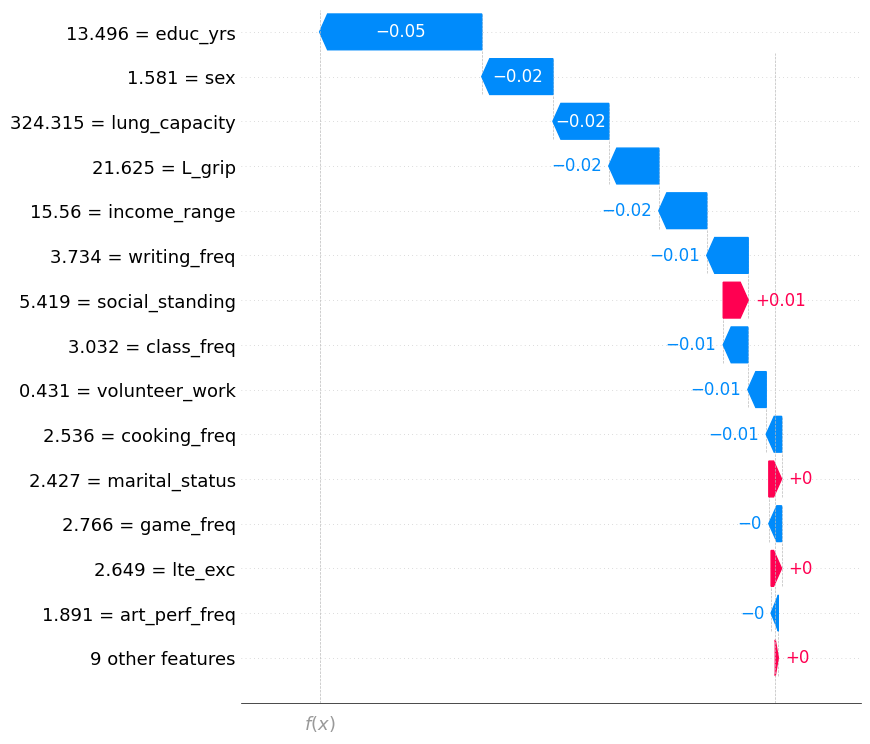

In [ ]:
#waterfall group plots of racial subgroups using waterfall_group()
individuals = XEp.loc[hispanicSubgroup.index]

explainerIndividualEp = shap.Explainer(modelEp) #or modelStrat
shap_valuesIndividualEp = explainerEp(individuals)
#shap.plots.waterfall(shap_valuesIndividualSem[1])
waterfall_group(shap_valuesIndividualEp, max_display=15)

In [ ]:
temp = next.drop(columns=['num_close_relative','num_close_friend','children_see','quality_sleep_hrs', 'cultural_eng_freq'])
#dropped these columns so that the output below displays all other columns

In [ ]:
temp.groupby('race_summary').mean()

,isKhandleBin,sex,marital_status,lung_capacity,cooking_freq,class_freq,game_freq,writing_freq,income_range,volunteer_work,art_perf_freq,social_standing,general_health,L_grip,R_grip,artcft_freq,vig_exc,lte_exc,educ_yrs,vrmem
race_summary,,,,,,,,,,,,,,,,,,,,
0,1.000000,1.567010,2.587629,340.244845,1.703608,1.113402,2.296392,2.855670,17.061856,0.528351,0.641753,5.262887,2.976804,24.283505,25.280928,1.407216,1.476804,3.211340,15.108247,0.210791
1,0.434109,1.700258,3.083979,326.892765,1.925065,1.425065,2.329457,2.901809,14.319121,0.531008,1.299742,4.560724,2.481912,26.222222,27.036176,1.313953,1.667959,3.098191,14.436693,0.229445
2,1.000000,1.490625,2.018750,346.031250,1.687500,1.656250,2.078125,2.731250,18.681250,0.740625,1.306250,6.628125,2.659375,22.603125,24.128125,1.459375,1.700000,2.965625,15.521875,0.243464
3,0.983871,1.580645,2.427419,324.314516,2.536290,3.032258,2.766129,3.733871,15.560484,0.431452,1.891129,5.419355,2.625000,21.625000,23.004032,2.633065,2.056452,2.649194,13.495968,-0.013425


In [ ]:
#features = XEp.iloc[:]
#shap.plots.decision(explainerEp.expected_value,explainerEp.shap_values(features), XEp.columns)
#shap.plots.decision(explainerEp.expected_value,explainerEp.shap_interaction_values(features), XEp.columns)
# honestly too complicated to show in manuscript but the ranking of interactions is interesting
# shap_valuesEp.cohorts(3)
# starts splitting by interactions after 2 cohorts

24it [00:14,  1.06it/s]


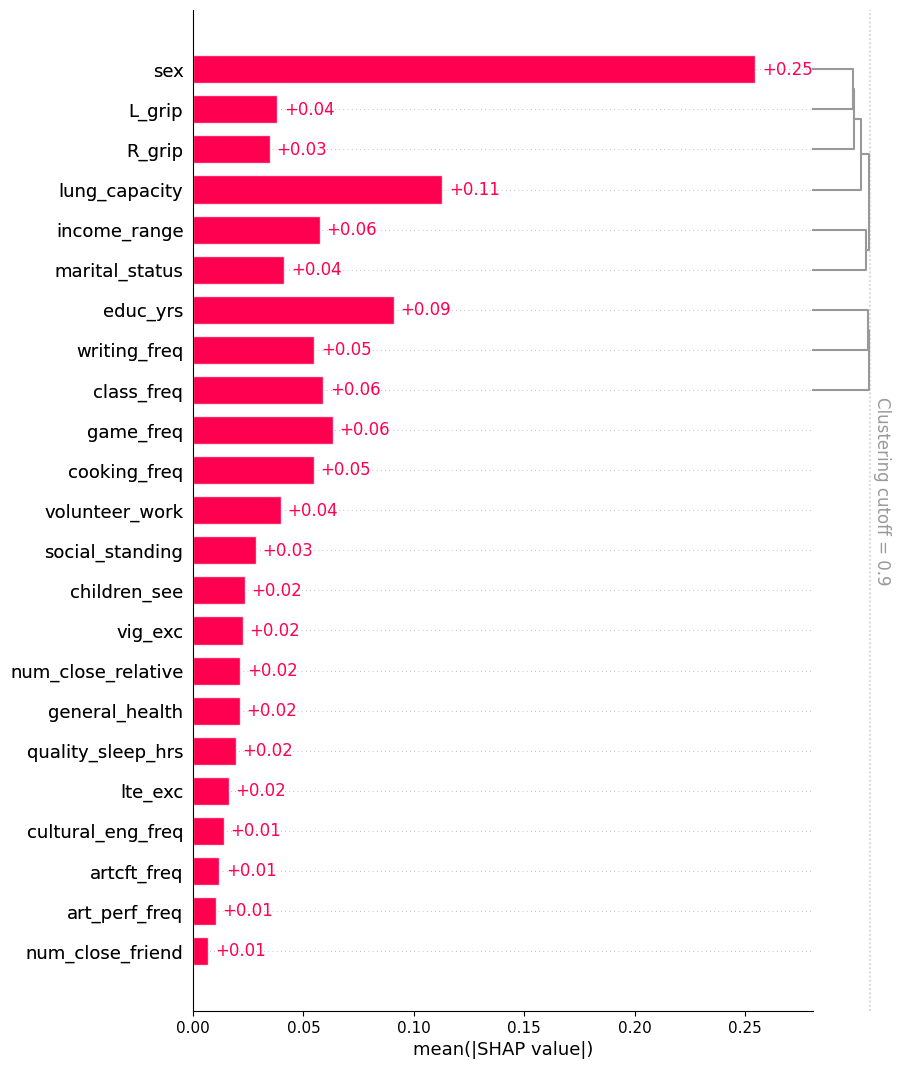

In [ ]:
clustering = shap.utils.hclust(XEp, yEp)
shap.plots.bar(shap_valuesEp, clustering = clustering, max_display=23, clustering_cutoff=0.9)
#theres some really interesting stuff happening with different clustering cutoffs here...

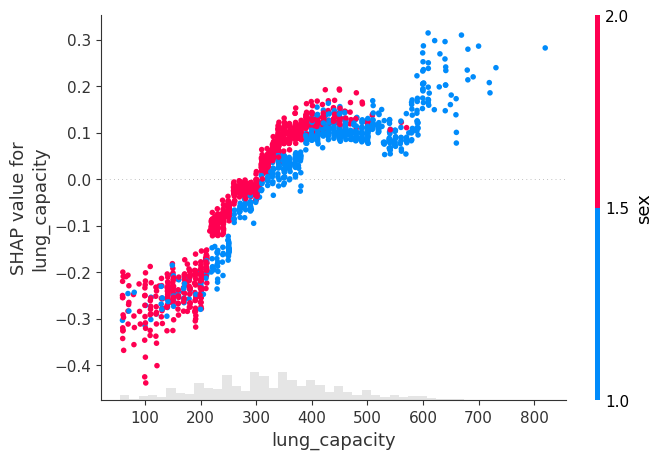

In [ ]:
shap.plots.scatter(shap_valuesEp[:,'lung_capacity'], color=shap_valuesEp[:,'sex']) #how can we add a fourth dimension to this???

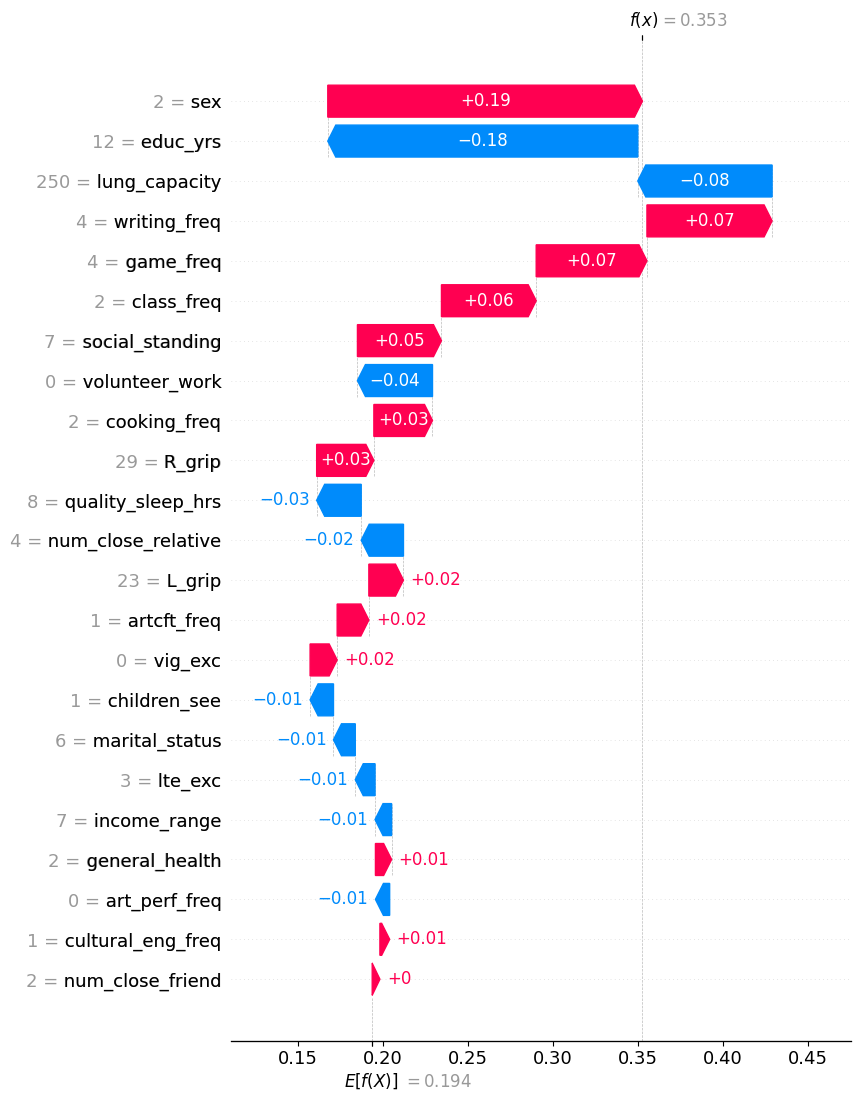

In [ ]:
shap.plots.waterfall(shap_valuesEp[744], max_display = 23)
#744 vs 1062

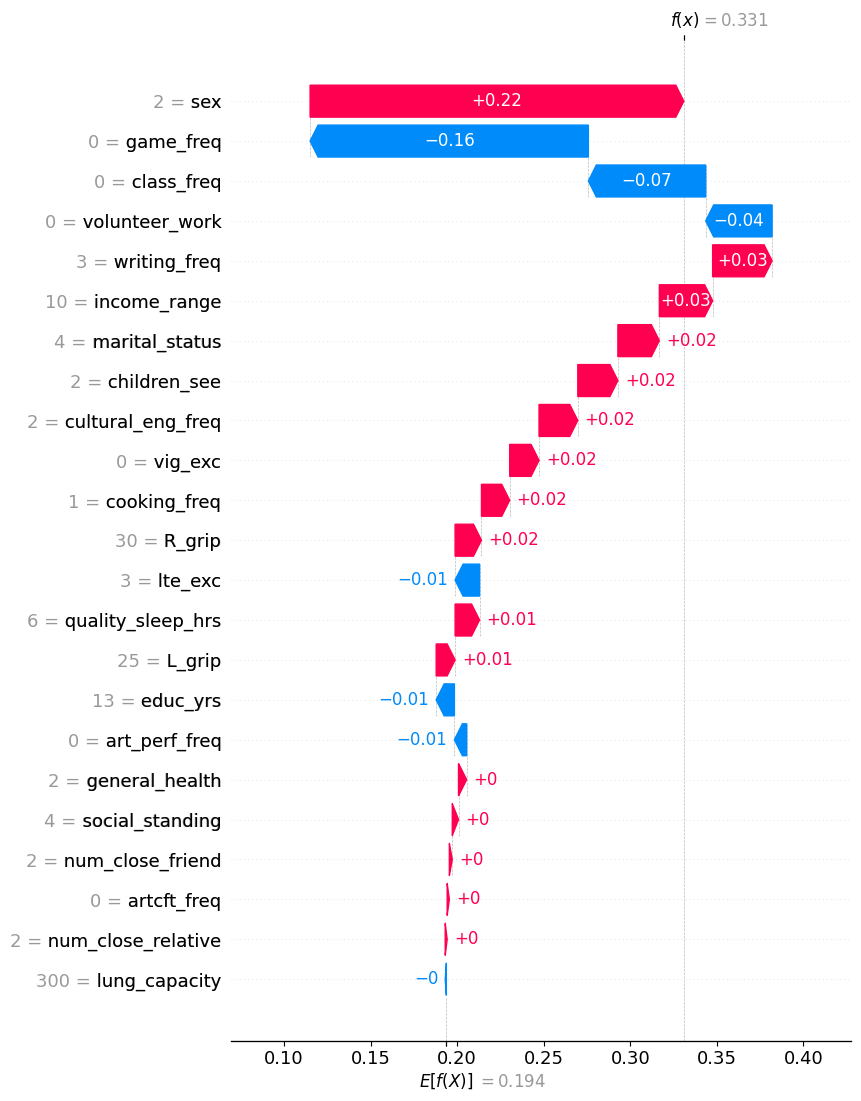

In [ ]:
shap.plots.waterfall(shap_valuesEp[1062], max_display = 23)